### Урок 3. TensorFlow

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
print(tf.__version__)

2.9.2


#### Загрузка датасета

Набор содержит 13 признаков:

 - **CRIM**: Уровень преступности на душу населения
 - **ZN**: Доля жилой земли, выделенной для участков более 25 000 квадратных футов
 - **INDUS**: Доля не торговых бизнес акров на город
 - **CHAS**: Переменная реки Чарлз (равна 1 если рядом река, 0 если нет)
 - **NOX**: Концентрация оксидов азота (частей на 10 миллионов)
 - **RM**: Среднее количество комнат на жилье
 - **AGE**: Пропорция домов частных владельцев, построенных до 1940 года
 - **DIS**: Взвешенные расстояния до пяти рабочих центров Бостона
 - **RAD**: Индекс доступности близлежащих автомагистралей
 - **TAX**: Полная стоимость налога на имущество на 10 000 долларов США
 - **PTRATIO**: Среднее количество учителей для детей на город
B 1000(Bk - 0.63)^2 , где Bk - это пропорция афроамериканцев на город
 - **LSTAT**: Процент населения с низким социальным статусом

In [4]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

print('train_data.shape', train_data.shape)  #(404, 13)
print('test_data.shape ', test_data.shape)  #(102, 13)

57026/57026 [==============================] - 0s 0us/step
train_data.shape (404, 13)
test_data.shape  (102, 13)


In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [6]:
# Метки
print(train_labels[0:10])  # Отобразим первые 10

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [7]:
# Нормализация.
scaler = MinMaxScaler((-1,1))
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

print(X_train[0])  # Первый тренировочный пример, нормализованный

[-9.72436739e-01 -1.00000000e+00 -4.36950147e-01 -1.00000000e+00
 -3.70370370e-01 -3.87296669e-04  8.29042225e-01 -4.05617544e-01
 -7.39130435e-01 -5.44933078e-01  7.87234043e-01  1.00000000e+00
 -6.23620309e-02]


#### Модель 1

 - активации линейные
 - функция потерь - среднеквадратичная ошибка
 - метрика - среднеквадратичная ошибка
 - 10 эпох по 5 примеру в батче

In [8]:
boston_model1 = Sequential([
    Dense(200, activation='linear', input_shape=(13,)),
    Dense(110, activation='linear'),
    Dense(1, activation='linear')
])

boston_model1.compile(optimizer='adam',
                     loss='mean_squared_error',
                     metrics=['mean_squared_error'])

boston_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2800      
                                                                 
 dense_1 (Dense)             (None, 110)               22110     
                                                                 
 dense_2 (Dense)             (None, 1)                 111       
                                                                 
Total params: 25,021
Trainable params: 25,021
Non-trainable params: 0
_________________________________________________________________


In [9]:
boston_history1 = boston_model1.fit( X_train, train_labels,
  epochs=10,
  batch_size=5, validation_split=0.2
)

Epoch 1/10
65/65 [==============================] - 3s 5ms/step - loss: 184.2930 - mean_squared_error: 184.2930 - val_loss: 79.0280 - val_mean_squared_error: 79.0280
Epoch 2/10
65/65 [==============================] - 0s 4ms/step - loss: 49.2699 - mean_squared_error: 49.2699 - val_loss: 48.5767 - val_mean_squared_error: 48.5767
Epoch 3/10
65/65 [==============================] - 0s 3ms/step - loss: 32.5179 - mean_squared_error: 32.5179 - val_loss: 33.0051 - val_mean_squared_error: 33.0051
Epoch 4/10
65/65 [==============================] - 0s 3ms/step - loss: 27.5895 - mean_squared_error: 27.5895 - val_loss: 28.7272 - val_mean_squared_error: 28.7272
Epoch 5/10
65/65 [==============================] - 0s 4ms/step - loss: 25.7438 - mean_squared_error: 25.7438 - val_loss: 31.3240 - val_mean_squared_error: 31.3240
Epoch 6/10
65/65 [==============================] - 0s 4ms/step - loss: 25.3117 - mean_squared_error: 25.3117 - val_loss: 26.2445 - val_mean_squared_error: 26.2445
Epoch 7/10
65/

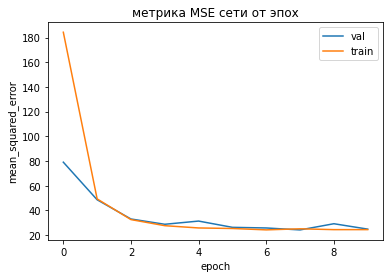

In [10]:
plt.plot(boston_history1.history['val_mean_squared_error'] ,label='val')
plt.plot(boston_history1.history['mean_squared_error'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.title('метрика MSE сети от эпох')
plt.show()

In [11]:
# Коэффициент детерминации на предсказании тестовой выборки
y_test_pred = boston_model1.predict(X_test)
r2_score(test_labels, y_test_pred)

4/4 [==============================] - 0s 2ms/step


0.7435179568979249

### Модель 2

 - активации relu
 - функция потерь - среднеквадратичная ошибка
 - метрика - средняя абсолютная ошибка
 - 100 эпох по 1 примеру в батче

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [14]:
boston_model2 = Sequential([
    Dense(300, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(110, activation='relu'),
    Dense(1,activation='linear' )
])


boston_model2.compile(optimizer=RMSprop(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error'])

boston_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               4200      
                                                                 
 dense_4 (Dense)             (None, 110)               33110     
                                                                 
 dense_5 (Dense)             (None, 1)                 111       
                                                                 
Total params: 37,421
Trainable params: 37,421
Non-trainable params: 0
_________________________________________________________________


In [15]:
boston_history2 = boston_model2.fit( train_data, train_labels,
  epochs=100,
  batch_size=1, validation_split=0.2
)

Epoch 1/100
323/323 [==============================] - 1s 3ms/step - loss: 342.6031 - mean_absolute_error: 12.9750 - val_loss: 80.7177 - val_mean_absolute_error: 6.3982
Epoch 2/100
323/323 [==============================] - 1s 3ms/step - loss: 128.9420 - mean_absolute_error: 8.2799 - val_loss: 61.9026 - val_mean_absolute_error: 6.0427
Epoch 3/100
323/323 [==============================] - 1s 3ms/step - loss: 84.1563 - mean_absolute_error: 6.6879 - val_loss: 83.7208 - val_mean_absolute_error: 6.2938
Epoch 4/100
323/323 [==============================] - 1s 3ms/step - loss: 68.6021 - mean_absolute_error: 5.9218 - val_loss: 57.4698 - val_mean_absolute_error: 4.9699
Epoch 5/100
323/323 [==============================] - 1s 3ms/step - loss: 60.8875 - mean_absolute_error: 5.6722 - val_loss: 57.1461 - val_mean_absolute_error: 5.0520
Epoch 6/100
323/323 [==============================] - 1s 3ms/step - loss: 55.6374 - mean_absolute_error: 5.3713 - val_loss: 48.3258 - val_mean_absolute_error: 4.

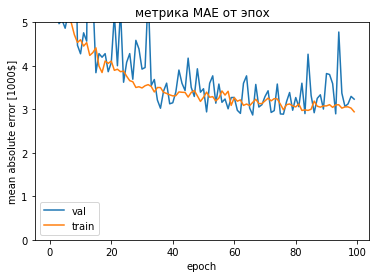

In [16]:
plt.plot(boston_history2.history['val_mean_absolute_error'] ,label='val')
plt.plot(boston_history2.history['mean_absolute_error'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean absolute error [1000$]')
plt.title('метрика MAE от эпох')
plt.ylim([0, 5])
plt.show()

In [17]:
result2 = []
# Коэффициент детерминации на предсказании тестовой выборки
y_test_pred2 = boston_model2.predict(test_data)
r2_score(test_labels, y_test_pred2)

4/4 [==============================] - 0s 3ms/step


0.641012686186428

In [18]:
[loss, mae] = boston_model2.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $3712.65


In [19]:
result2.append([r2_score(test_labels, y_test_pred2), loss, mae])
print(result2)

[[0.641012686186428, 29.883487701416016, 3.7126474380493164]]


#### Модель 3

In [20]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

# Перемешаем тренировочные данные
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [21]:
# Нормализация
scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[0])  # Первый тренировочный пример, нормализованный

[-0.99968012  0.7        -0.97947214 -1.         -0.89711934  0.0929512
 -0.32440783  0.68213179 -0.91304348 -0.52198853  0.          1.
 -0.77704194]


In [22]:
boston_model2 = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1,activation='linear')
])


boston_model2.compile(optimizer=RMSprop(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error'])

boston_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [23]:
boston_history2 = boston_model2.fit( train_data, train_labels,
  epochs=200,
  batch_size=1, validation_split=0.2
)


Epoch 1/200
323/323 [==============================] - 2s 3ms/step - loss: 149.2501 - mean_absolute_error: 8.8190 - val_loss: 53.2883 - val_mean_absolute_error: 5.0497
Epoch 2/200
323/323 [==============================] - 1s 3ms/step - loss: 35.3525 - mean_absolute_error: 4.0360 - val_loss: 35.0967 - val_mean_absolute_error: 3.6511
Epoch 3/200
323/323 [==============================] - 1s 3ms/step - loss: 23.5345 - mean_absolute_error: 3.1804 - val_loss: 30.5685 - val_mean_absolute_error: 3.5296
Epoch 4/200
323/323 [==============================] - 1s 3ms/step - loss: 20.2435 - mean_absolute_error: 2.9454 - val_loss: 26.0665 - val_mean_absolute_error: 3.7018
Epoch 5/200
323/323 [==============================] - 1s 3ms/step - loss: 18.9176 - mean_absolute_error: 2.8461 - val_loss: 25.0145 - val_mean_absolute_error: 3.2019
Epoch 6/200
323/323 [==============================] - 1s 3ms/step - loss: 17.4935 - mean_absolute_error: 2.7592 - val_loss: 23.7045 - val_mean_absolute_error: 3.39

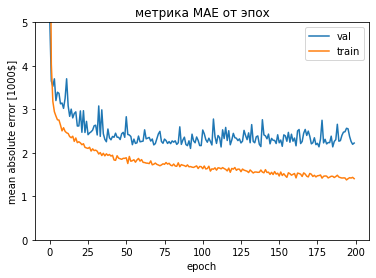

In [24]:
plt.plot(boston_history2.history['val_mean_absolute_error'] ,label='val')
plt.plot(boston_history2.history['mean_absolute_error'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean absolute error [1000$]')
plt.title('метрика MAE от эпох')
plt.ylim([0, 5])
plt.show()

In [25]:
result2 = []
# Коэффициент детерминации на предсказании тестовой выборки
y_test_pred2 = boston_model2.predict(test_data)
r2_score(test_labels, y_test_pred2)

4/4 [==============================] - 0s 2ms/step


0.7747428028648755

Модель с 10-15 вариантами комбинаций функции потерь и метрик

In [26]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

# Перемешаем тренировочные данные
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [27]:
# Нормализация
scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

 - активации relu
 - функция потерь - среднеквадратичная ошибка, средняя абсолютная ошибка,  - средняя абсолютная ошибка в процентах
 - метрика - среднеквадратичная ошибка, средняя абсолютная ошибка, средняя  - абсолютная ошибка в процентах
 - 200 эпох по 1 примеру в батче

In [28]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1,activation='linear')
])

result = []


# сетка параметров
loss_space = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
metrics_space = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']

for loss_item in loss_space:
    for metrics_item in metrics_space:
    
        model.compile(optimizer=RMSprop(learning_rate=0.001),
                             loss=loss_item,
                             metrics=[metrics_item])
        
        model.fit( train_data, train_labels,
                        epochs=200,
                        batch_size=1, validation_split=0.2
                        )
        
        # Коэффициент детерминации на предсказании тестовой выборки
        y_test_pred = model.predict(test_data)
        
        [loss, metric] = model.evaluate(test_data, test_labels, verbose=0)
               
        # накопление результатов
        result.append([loss_item, loss, metrics_item, metric, r2_score(test_labels, y_test_pred)])   

Epoch 1/200
323/323 [==============================] - 1s 3ms/step - loss: 118.7445 - mean_squared_error: 118.7445 - val_loss: 67.7637 - val_mean_squared_error: 67.7637
Epoch 2/200
323/323 [==============================] - 1s 3ms/step - loss: 38.6884 - mean_squared_error: 38.6884 - val_loss: 46.9496 - val_mean_squared_error: 46.9496
Epoch 3/200
323/323 [==============================] - 1s 3ms/step - loss: 24.9630 - mean_squared_error: 24.9630 - val_loss: 33.3226 - val_mean_squared_error: 33.3226
Epoch 4/200
323/323 [==============================] - 1s 3ms/step - loss: 22.9652 - mean_squared_error: 22.9652 - val_loss: 28.8202 - val_mean_squared_error: 28.8202
Epoch 5/200
323/323 [==============================] - 1s 3ms/step - loss: 20.7064 - mean_squared_error: 20.7064 - val_loss: 26.0033 - val_mean_squared_error: 26.0033
Epoch 6/200
323/323 [==============================] - 1s 3ms/step - loss: 19.8927 - mean_squared_error: 19.8927 - val_loss: 25.0991 - val_mean_squared_error: 25.0

In [29]:
# Оценки на тестовой выборке
pd.DataFrame(result, columns=['loss_item','loss',
                              'metrics_item', 'metric',
                              'r2_score(test_labels, y_test_pred)']).\
                              sort_values('r2_score(test_labels, y_test_pred)',ascending=False).head(10)

,loss_item,loss,metrics_item,metric,"r2_score(test_labels, y_test_pred)"
6,mean_absolute_percentage_error,12.354567,mean_squared_error,9.768856,0.882648
7,mean_absolute_percentage_error,12.848403,mean_absolute_error,2.316753,0.878952
8,mean_absolute_percentage_error,12.356540,mean_absolute_percentage_error,12.356540,0.874049
5,mean_absolute_error,2.219218,mean_absolute_percentage_error,12.572579,0.862939
4,mean_absolute_error,2.412546,mean_absolute_error,2.412546,0.850755
3,mean_absolute_error,2.429086,mean_squared_error,12.427550,0.850709
2,mean_squared_error,14.166050,mean_absolute_percentage_error,12.730242,0.829825
1,mean_squared_error,16.753010,mean_absolute_error,2.734780,0.798748
0,mean_squared_error,19.456516,mean_squared_error,19.456516,0.766271


### Вывод:

 - выбор активатора,
 - подбор количества эпох - 200 оптимальное количество
 - выбор loss, metrics.